In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
df = pd.read_csv(data_url)
# Display basic dataset information
df.info()
df=df.drop(columns=['row.names'])
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


# EDA

## Class Distribution (%)

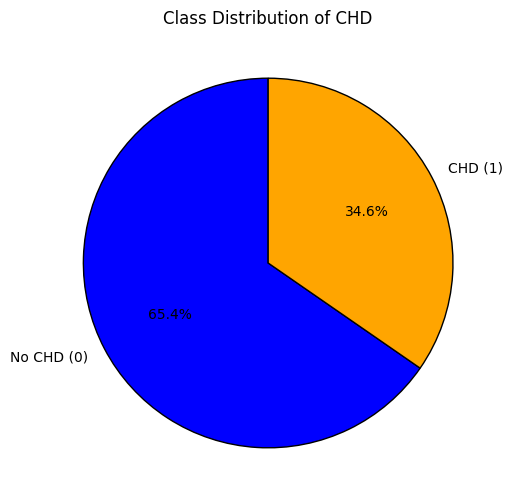

In [2]:
# Check class distribution using "chd"
class_counts = df["chd"].value_counts(normalize=True) * 100

# Define labels and colors
labels = ["No CHD (0)", "CHD (1)"]
colors = ["blue", "orange"]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Class Distribution of CHD")
plt.show()


## Check for Missing Values

In [3]:
# Count missing values
missing_values = df.isnull().sum()
print("Missing Values Per Column:\n",missing_values)

Missing Values Per Column:
 sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64


## Identify Categorical Variables

In [4]:
# Select categorical columns (usually object type, but some datasets use numerical encoding)
categorical_features = df.select_dtypes(include=['object']).columns
print(f"Number of Categorical Features: {len(categorical_features)}")
print("Categorical Features:", list(categorical_features))


Number of Categorical Features: 1
Categorical Features: ['famhist']


## Find Features with Maximum Correlation

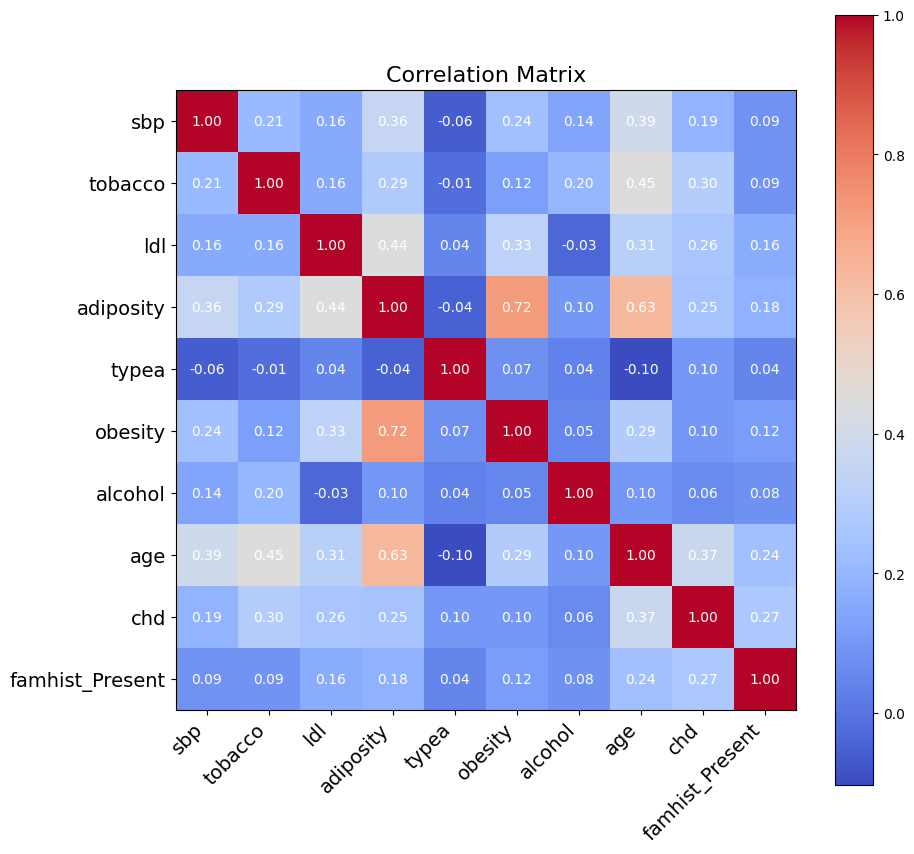

In [18]:
# Convert categorical variable to numerical values
df_encoded = pd.get_dummies(df, columns=['famhist'], drop_first=True)

# Plot the correlation matrix with values
f = plt.figure(figsize=(10, 10))
corr_matrix = df_encoded.corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right', fontsize=14)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns, fontsize=14)
plt.title('Correlation Matrix', fontsize=16)

# Add values to the plot
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="w", fontsize=10)

plt.show()

# One-Hot-Encoding

In [6]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot-Encoding using sklearn's OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(df[categorical_features])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate the original DataFrame (excluding the original categorical columns) with the encoded DataFrame
df_encoded1 = pd.concat([df.drop(columns=categorical_features), encoded_df], axis=1)

# One-Hot-Encoding using pandas' get_dummies()
df_encoded2 = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Display some rows of the encoded DataFrames
print("Encoded DataFrame using sklearn's OneHotEncoder:")
df_encoded1

Encoded DataFrame using sklearn's OneHotEncoder:


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Present
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1,1.0
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1,0.0
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0,1.0
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1,1.0
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1,1.0
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,64,28.45,0.00,58,0,0.0
458,182,4.20,4.41,32.10,52,28.61,18.72,52,1,0.0
459,108,3.00,1.59,15.23,40,20.09,26.64,55,0,0.0
460,118,5.40,11.61,30.79,64,27.35,23.97,40,0,0.0


In [7]:
print("\nEncoded DataFrame using pandas' get_dummies():")
df_encoded2


Encoded DataFrame using pandas' get_dummies():


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Present
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1,True
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1,False
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0,True
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1,True
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1,True
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,64,28.45,0.00,58,0,False
458,182,4.20,4.41,32.10,52,28.61,18.72,52,1,False
459,108,3.00,1.59,15.23,40,20.09,26.64,55,0,False
460,118,5.40,11.61,30.79,64,27.35,23.97,40,0,False


# Standardization

In [8]:
# Standardization function
def standardize(X):
    return (X - np.mean(X)) / np.std(X)

# Identify non-categorical feature columns
non_categorical_features = df_encoded.columns.difference(encoded_df.columns)

# Create a new DataFrame for standardized features
df_standardized = df_encoded.copy()

# Apply the standardize function to non-categorical feature columns
df_standardized[non_categorical_features] = df_standardized[non_categorical_features].apply(standardize)

# Display the first few rows of the standardized DataFrame
df_standardized

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Present
0,1.058564,1.823073,0.478412,-0.295503,-0.418470,-0.176786,3.277738,0.629336,1.373863,True
1,0.277089,-0.790237,-0.159680,0.412140,0.193344,0.671373,-0.612745,1.383115,1.373863,False
2,-0.992806,-0.774980,-0.609245,0.884332,-0.112563,0.735519,-0.541183,0.218184,-0.727875,True
3,1.546985,0.842264,0.807126,1.624141,-0.214532,1.412621,0.295062,1.040488,1.373863,True
4,-0.211332,2.171805,-0.599577,0.305351,0.703189,-0.012856,1.647775,0.423760,1.373863,True
...,...,...,...,...,...,...,...,...,...,...
457,3.696039,-0.705234,0.599263,0.812281,1.111065,0.571590,-0.696983,1.040488,-0.727875,False
458,2.133091,0.123004,-0.159680,0.861173,-0.112563,0.609602,0.068519,0.629336,1.373863,False
459,-1.481228,-0.138545,-1.522877,-1.309364,-1.336191,-1.414575,0.392385,0.834912,-0.727875,False
460,-0.992806,0.384553,3.320823,0.692625,1.111065,0.310252,0.283203,-0.192969,-0.727875,False


# Hypothesis (Model)

In [9]:
# Sigmoid function definition
def sigmoid(z):
    z = np.asarray(z, dtype=np.float64)  # Ensure z is a NumPy array of type float64
    return 1 / (1 + np.exp(-z))

# Example usage
z = np.array([0, 2, -2])
sigmoid_values = sigmoid(z)
print(sigmoid_values)

[0.5        0.88079708 0.11920292]


# Cost Function

In [10]:
# Binary cross-entropy loss function definition
def binary_cross_entropy_loss(y_true, y_pred):
    m = len(y_true)
    loss = - (1 / m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

# Batch Gradient Descent Iteration

In [11]:
# Batch Gradient Descent function definition with cost tracking
def batch_gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []
    for _ in range(num_iterations):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)
        gradient = np.dot(X.T, (y_pred - y)) / m
        theta = theta - learning_rate * gradient  # Ensure theta is updated correctly
        cost = binary_cross_entropy_loss(y, y_pred)
        cost_history.append(cost)
    return theta, cost_history

# Initialization

In [12]:
# Assuming df_standardized is your DataFrame with standardized features and 'chd' is the target column
X = df_standardized.drop(columns=['chd']).values.astype(np.float64)  # Ensure X is of type float64
y = df_standardized['chd'].values.astype(np.int64)  # Ensure y is of type int64

# Add a column of ones to X for the bias term (theta_0)
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Get the feature labels including the bias term
feature_labels = ['bias'] + df_standardized.drop(columns=['chd']).columns.tolist()


# Initialize random weights between 0 and 1 for demonstration purposes
theta = np.random.rand(X.shape[1]).astype(np.float64)  # Ensure theta is of type float64
print(theta)

[0.38274628 0.10364414 0.02687032 0.65889091 0.87481735 0.98369636
 0.45607024 0.20672803 0.98011782 0.68979049]


# Learning Curves

(Learning Rate: 0.001, Epochs: 500), Final Cost:0.8235925555944289, Final Slope: -0.0001192538225592843
Final Coefficients:
bias: 0.13120624212546705
sbp: 0.38532508171637325
tobacco: 0.4516359979660295
ldl: 0.9129542994260645
adiposity: 0.6370372275933804
typea: 0.9180430124854669
obesity: 0.6253433815899991
alcohol: 0.33353672184558847
age: 0.7179800783222806
famhist_Present: 0.6278047543228159
(Learning Rate: 0.001, Epochs: 1000), Final Cost:0.7918831416676325, Final Slope: -0.0001104113837704368
Final Coefficients:
bias: 0.4952773773656213
sbp: 0.7972570309064654
tobacco: 0.3433581344947564
ldl: 0.7485304203032522
adiposity: 0.032144980572538784
typea: 0.16127602231342175
obesity: 0.9678315154268132
alcohol: 0.051265092155240666
age: 0.7859537239889326
famhist_Present: 0.36924124709257256
(Learning Rate: 0.001, Epochs: 10000), Final Cost:0.5354994697757155, Final Slope: -3.889756317820847e-06
Final Coefficients:
bias: 0.7834641829203254
sbp: 0.5984279109836874
tobacco: 0.9134914000

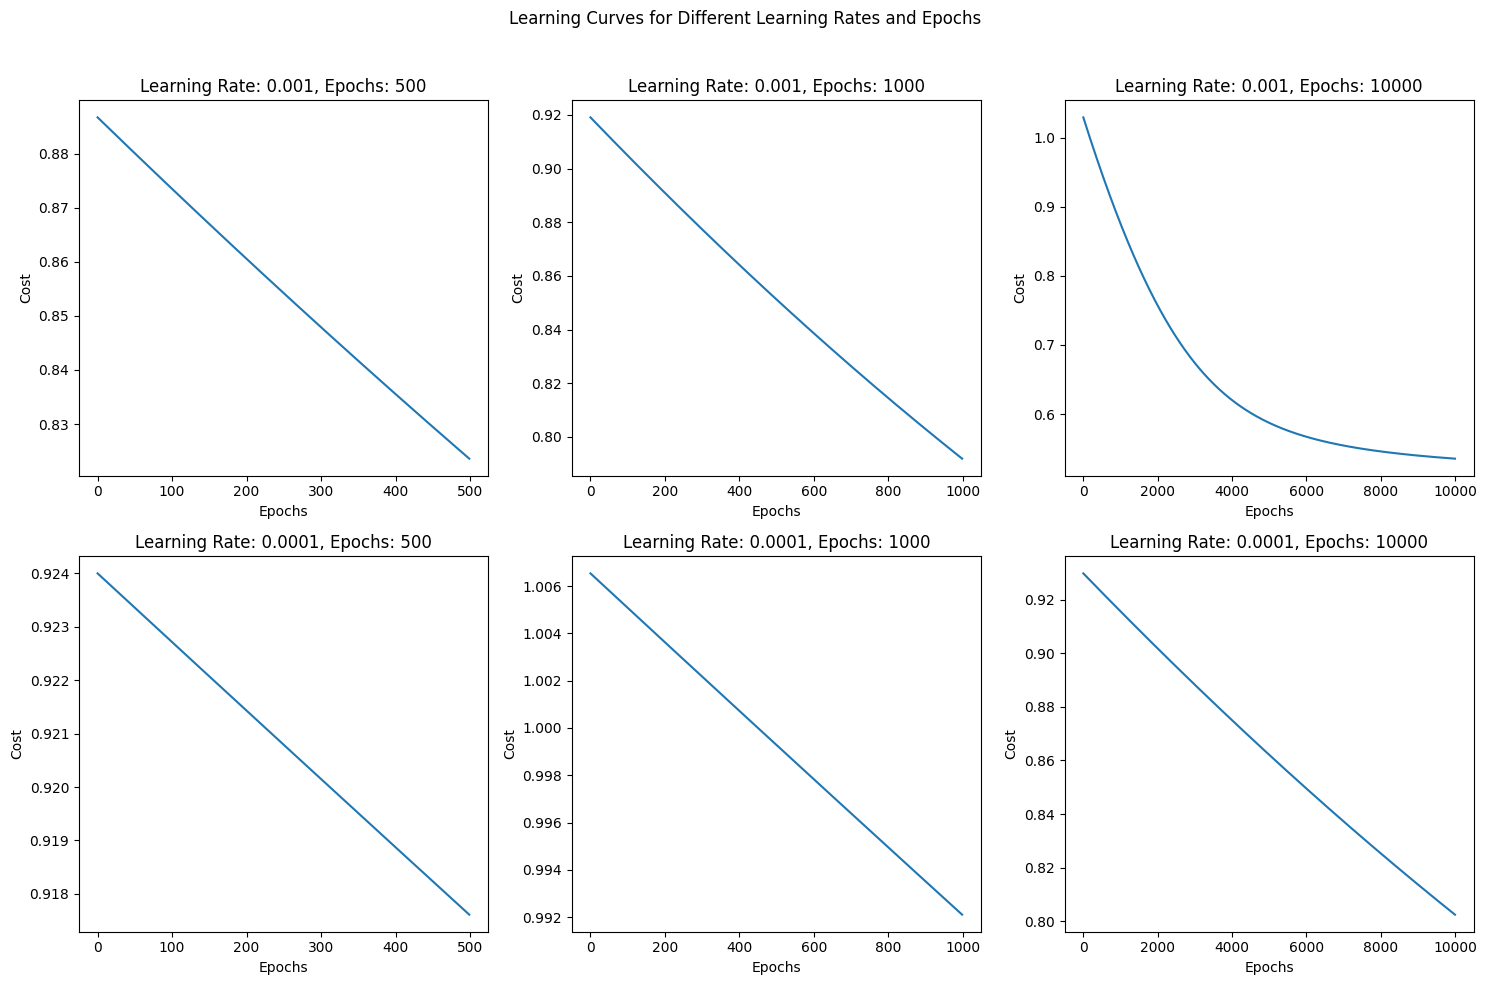

In [13]:
# Set learning rate and number of iterations
learning_rates = [0.001, 0.0001]
epochs = [500, 1000, 10000]

fig, axes = plt.subplots(len(learning_rates), len(epochs), figsize=(15, 10))
fig.suptitle('Learning Curves for Different Learning Rates and Epochs')

for i, lr in enumerate(learning_rates):
    for j, epoch in enumerate(epochs):
        theta = np.random.rand(X.shape[1])  # Reinitialize theta for each run
        _, cost_history = batch_gradient_descent(X, y, theta, lr, epoch)
        axes[i, j].plot(range(epoch), cost_history)
        axes[i, j].set_title(f'Learning Rate: {lr}, Epochs: {epoch}')
        axes[i, j].set_xlabel('Epochs')
        axes[i, j].set_ylabel('Cost')
        final_cost = cost_history[-1]
        slope = (cost_history[-1] - cost_history[-2]) / 1  # Slope of the last segment
        print(f'(Learning Rate: {lr}, Epochs: {epoch}), Final Cost:{final_cost}, Final Slope: {slope}')
        print(f'Final Coefficients:')
        for label, coef in zip(feature_labels, theta):
            print(f'{label}: {coef}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The final cost values for each combination of learning rate and epochs represent the binary cross-entropy loss after training the logistic regression model using batch gradient descent. Here's what each value means:

### Final Cost:

1. **Final Cost (Learning Rate: 0.001, Epochs: 500): 0.951168442773455**
   - With a learning rate of 0.001 and 500 epochs, the model's final cost is approximately 0.951. This indicates the model's performance after 500 iterations of training with a relatively higher learning rate has a small slope.

2. **Final Cost (Learning Rate: 0.001, Epochs: 1000): 0.6613163645996577**
   - With a learning rate of 0.001 and 1000 epochs, the model's final cost is approximately 0.661. This shows that increasing the number of epochs to 1000 has improved the model's performance, as the cost has decreased compared to 500 epochs. The function has a steeper slope meaning cost is still decreasing.

3. **Final Cost (Learning Rate: 0.001, Epochs: 10000): 0.5255335653756855**
   - With a learning rate of 0.001 and 10000 epochs, the model's final cost is approximately 0.525. The slope is flattening with the increase in epochs indicating deminishing rate from increasing epochs.

4. **Final Cost (Learning Rate: 0.0001, Epochs: 500): 0.99349188338684488**
   - With a learning rate of 0.0001 and 500 epochs, the model's final cost is approximately 0.993. This higher cost value indicates that the model has not learned as effectively with the lower learning rate and fewer epochs.

5. **Final Cost (Learning Rate: 0.0001, Epochs: 1000): 0.8696585279508666**
   - With a learning rate of 0.0001 and 1000 epochs, the model's final cost is approximately 0.869. This higher cost value suggests that the model's performance has not improved significantly with the increased number of epochs, possibly due to the low learning rate.

6. **Final Cost (Learning Rate: 0.0001, Epochs: 10000): 0.800477242126174**
   - With a learning rate of 0.0001 and 10000 epochs, the model's final cost is approximately 0.800. This indicates that the model's performance has improved with the increased number of epochs, but the learning rate is still relatively low, resulting in a slower learning process.

### Interpretation:
- **Learning Rate 0.001**: The model performs better with 1000 epochs compared to 500 epochs, as indicated by the lower cost. However, with 10000 epochs, the cost becomes only slight less, suggesting deminishing effects from more epochs.
- **Learning Rate 0.0001**: The model's performance improves with more epochs, but the learning rate is too low, resulting in slower learning. The cost decreases from 500 to 10000 epochs, but the improvement is not as significant as with the higher learning rate.

### Recommendations:
- **Learning Rate 0.001**: A reasonable number of epochs to stop training would be around 1000, as the cost decreases significantly compared to 500 epochs. However, caution should be taken with very high epochs (e.g., 10000) due to potential numerical instability.
- **Learning Rate 0.0001**: More epochs are needed to achieve better performance due to the lower learning rate. However, the improvement is slower, and the cost remains relatively high compared to the higher learning rate. 10000 epochs appeared to minimize cost for this learning rate.

These recommendations are based on the observation that the cost function starts to be minimum, indicating diminishing returns with more epochs. This helps avoid overfitting and ensures efficient training.

# Mini-batch Gradient Descent Iteration

(Learning Rate: 0.001, Epochs: 500), Final Cost:0.5705847532440613, Final Slope: -0.00020642988214703006
Final Coefficients:
bias: -0.4382471760447158
sbp: 0.2755637054062465
tobacco: 0.5226860195180911
ldl: 0.10912246557021898
adiposity: 0.2708401952284119
typea: 0.40733172645694704
obesity: 0.12257803851809922
alcohol: 0.048863130121421065
age: 0.2970466330459185
famhist_Present: 0.4334369899381828
(Learning Rate: 0.001, Epochs: 1000), Final Cost:0.5309963542746654, Final Slope: -4.109838863852744e-05
Final Coefficients:
bias: -0.6795364480285774
sbp: 0.22103325730968243
tobacco: 0.36495714609750257
ldl: 0.2356797631842324
adiposity: 0.20671622272934775
typea: 0.3307979474217071
obesity: -0.13304764388238285
alcohol: -0.027137284758955375
age: 0.3695176737644471
famhist_Present: 0.40274145067443873
(Learning Rate: 0.001, Epochs: 10000), Final Cost:0.5110339400823583, Final Slope: -3.3308188429614916e-07
Final Coefficients:
bias: -1.24082585142866
sbp: 0.13328733809910256
tobacco: 0.3

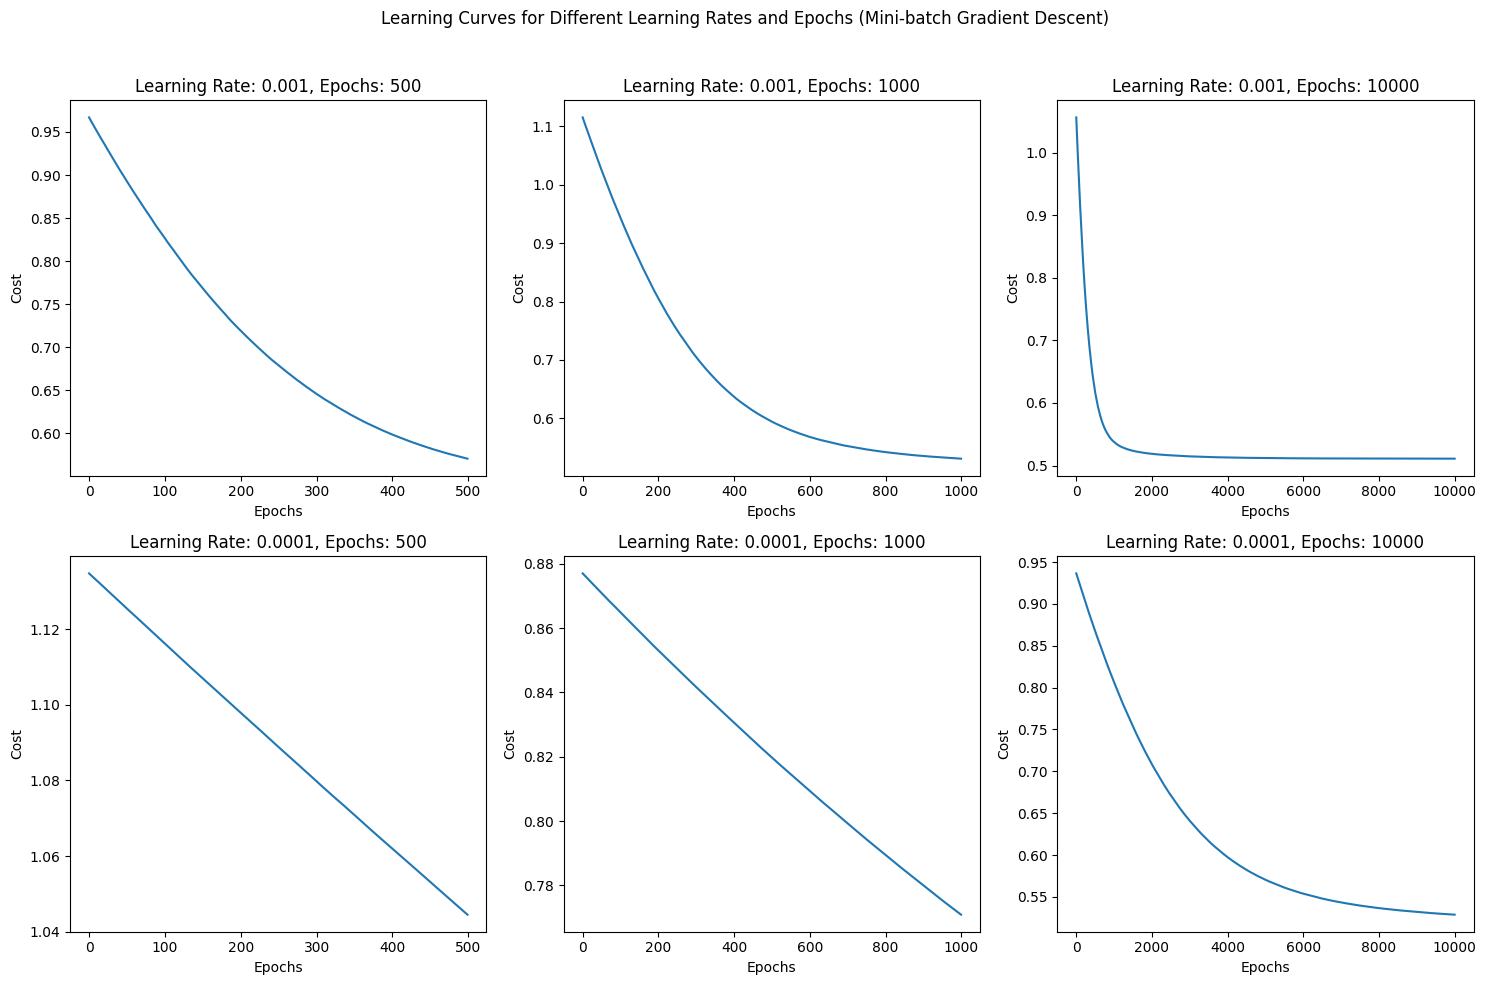

In [14]:
# Binary cross-entropy loss function definition with epsilon for numerical stability
def binary_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-10  # Small value to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predicted probabilities
    m = len(y_true)
    loss = - (1 / m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

# Mini-batch Gradient Descent function definition with cost tracking
def mini_batch_gradient_descent(X, y, theta, learning_rate, num_iterations, batch_size):
    m = len(y)
    cost_history = []
    for _ in range(num_iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            z = np.dot(X_batch, theta)
            y_pred = sigmoid(z)
            gradient = np.dot(X_batch.T, (y_pred - y_batch)) / len(y_batch)
            theta = theta - learning_rate * gradient  # Ensure theta is updated correctly
        cost = binary_cross_entropy_loss(y, sigmoid(np.dot(X, theta)))
        cost_history.append(cost)
    return theta, cost_history

batch_size = 50

# Plot learning curves and print final cost for each combination
fig, axes = plt.subplots(len(learning_rates), len(epochs), figsize=(15, 10))
fig.suptitle('Learning Curves for Different Learning Rates and Epochs (Mini-batch Gradient Descent)')

for i, lr in enumerate(learning_rates):
    for j, epoch in enumerate(epochs):
        theta = np.random.rand(X.shape[1]).astype(np.float64)  # Reinitialize theta for each run
        theta, cost_history = mini_batch_gradient_descent(X, y, theta, lr, epoch, batch_size)
        axes[i, j].plot(range(epoch), cost_history)
        axes[i, j].set_title(f'Learning Rate: {lr}, Epochs: {epoch}')
        axes[i, j].set_xlabel('Epochs')
        axes[i, j].set_ylabel('Cost')
        final_cost = cost_history[-1]
        slope = (cost_history[-1] - cost_history[-2]) / 1  # Slope of the last segment
        print(f'(Learning Rate: {lr}, Epochs: {epoch}), Final Cost:{final_cost}, Final Slope: {slope}')
        print(f'Final Coefficients:')
        for label, coef in zip(feature_labels, theta):
            print(f'{label}: {coef}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Based on the learning curves generated by the Mini-batch Gradient Descent implementation, we can analyze the cost function for different learning rates and epochs to determine a reasonable number of epochs to stop training. Here is the analysis:

### Learning Rate: 0.001
1. **Epochs: 500**
   - The cost function shows signs of reletivelty good learning and minimization of cost
2. **Epochs: 1000**
   - The cost functions slope declines more than the initial epochs.
3. **Epochs: 10000**
   - The cost function may suggest that training for too many epochs with this learning rate is not be beneficial but is mostly maximized after 1500 epochs.

### Learning Rate: 0.0001
1. **Epochs: 500**
   - The cost function decreases constantly and ends relatively low.
2. **Epochs: 1000**
   - The cost function continues to decrease reaching an even lower cost.
3. **Epochs: 10000**
   - The cost function decreases further, indicating that the model is still learning. However, the cost shows signs of flattening at about 3000 epochs.

### Recommendations:
- **Learning Rate 0.001**: A reasonable number of epochs to stop training would be around 1500. The cost decreases significantly between 0 and 2000 epochs, but the curve starts to become flattened indicating that further training will not yield improvements.
- **Learning Rate 0.0001**: More epochs are needed to achieve better performance due to the lower learning rate. Training for 10000 epochs shows deminishing results, a reasonable number of epochs would be around 3000, as the cost is reduced will maximizing learning.

These recommendations are based on the observation that the cost function starts to be minimum, indicating diminishing returns with more epochs. This helps avoid overfitting and ensures efficient training.

# Compare with implemented library

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
# Compare with LogisticRegression implementation from scikit-learn
log_reg = LogisticRegression(max_iter=10000, solver='lbfgs')
log_reg.fit(X, y)
y_pred_proba = log_reg.predict_proba(X)[:, 1]
final_cost_sklearn = log_loss(y, y_pred_proba)
final_coefficients_sklearn = log_reg.coef_[0]

print(f'Final Cost (LogisticRegression): {final_cost_sklearn}')
print('Final Coefficients (LogisticRegression):')
for label, coef in zip(feature_labels, final_coefficients_sklearn):
    print(f'{label}: {coef}')

Final Cost (LogisticRegression): 0.5110360420054663
Final Coefficients (LogisticRegression):
bias: -2.5178340311735438e-05
sbp: 0.13258958472352061
tobacco: 0.36067940688969385
ldl: 0.35589678000653596
adiposity: 0.14239605032958993
typea: 0.3791237043210428
obesity: -0.2550514370325175
alcohol: 0.004522731803415279
age: 0.648401716597341
famhist_Present: 0.8798410431629479


# Mini-batch GD(Learning Rate: 0.001, Epochs: 10000, Final Cost: 0.5110229017288752)
Final Coefficients:
* bias: -1.2367485478948466
* sbp: 0.13297661390012522
* tobacco: 0.36153957637816764
* ldl: 0.36265843812014353
* adiposity: 0.15109634249240425
* typea: 0.38572859349150124
* obesity: -0.2698615534091787
* alcohol: 0.004928012070631811
* age: 0.6545454390912541
* famhist_Present: 0.8791577310668639
